In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd 
#Aca se importan los paquetes de python que se necesitan para el analisis de datos 

In [3]:
#Se escogio una base de datos traida desde Google database search, en la cual se encuentran las visitas a todos los museos 
# del Reino Unido discriminado por museo/año/mes/visitas. Desde el año 2004 hasta el año 2019. 

data=pd.read_csv('museums.csv', encoding='ISO-8859-1') #Aca se leen los datos desde el paquete de Pandas

In [4]:
#Este comando sirve para mostrar todos los "atributos" que tiene la columna museum del dataset. En este caso son todos
# los museos que considera el dataset.

data.museum.unique()

array(['TOTAL VISITOR FIGURES', 'BRITISH MUSEUM', 'GEFFRYE MUSEUM',
       'HORNIMAN MUSEUM (Excluding visits to the Garden)',
       'IMPERIAL WAR MUSEUM (IWM) TOTAL', '(IWM) LONDON',
       '(IWM) HMS BELFAST', '(IWM) CHURCHILL WAR ROOMS', '(IWM) DUXFORD',
       '(IWM) NORTH', 'NATIONAL GALLERY',
       'NATURAL HISTORY MUSEUM (NHM) TOTAL', '(NHM) SOUTH KENSINGTON',
       '(NHM) TRING', 'ROYAL MUSEUMS GREENWICH',
       'NATIONAL MUSEUMS LIVERPOOL', 'SCIENCE MUSEUM GROUP (SMG) TOTAL',
       '(SMG) SOUTH KENSINGTON', '(SMG) NATIONAL MEDIA MUSEUM',
       '(SMG) NATIONAL RAILWAY MUSEUM', '(SMG) LOCOMOTION AT SHILDON',
       '(SMG) MUSEUM OF SCIENCE AND INDUSTRY, MANCHESTER',
       'NATIONAL COAL MINING MUSEUM FOR ENGLAND',
       '(SMG) SWINDON (WROUGHTON)', 'NATIONAL PORTRAIT GALLERY',
       'ROYAL ARMOURIES (RA) TOTAL', '(RA) LEEDS', '(RA) FORT NELSON',
       '(RA) WHITE TOWER (BASED AT THE TOWER OF LONDON)',
       "SIR JOHN SOANE'S MUSEUM", 'TATE GALLERIES TOTAL', 'TATE BRIT

In [5]:
# Sin embargo, el dataset descargado también incluye el total de una comunidad de museos. Por ejemplo, el 
# IMPERIAL WAR MUSEUM (IWM) comprende varios museos en todo Inglaterra, así que en el dataset podemos encontrar
# el numero de visitas anuales de cada museo miembro y el total de visitas de todos los museos IWM. Por esta razon
# discriminamos los museos de manera independiente quitando las comunidades de museos.


lista=['BRITISH MUSEUM', 'GEFFRYE MUSEUM',
       'HORNIMAN MUSEUM (Excluding visits to the Garden)', '(IWM) LONDON',
       '(IWM) HMS BELFAST', '(IWM) CHURCHILL WAR ROOMS', '(IWM) DUXFORD',
       '(IWM) NORTH', 'NATIONAL GALLERY', '(NHM) SOUTH KENSINGTON',
       '(NHM) TRING', 'ROYAL MUSEUMS GREENWICH',
       'NATIONAL MUSEUMS LIVERPOOL','(SMG) SOUTH KENSINGTON', '(SMG) NATIONAL MEDIA MUSEUM',
       '(SMG) NATIONAL RAILWAY MUSEUM', '(SMG) LOCOMOTION AT SHILDON',
       '(SMG) MUSEUM OF SCIENCE AND INDUSTRY, MANCHESTER',
       'NATIONAL COAL MINING MUSEUM FOR ENGLAND',
       '(SMG) SWINDON (WROUGHTON)', 'NATIONAL PORTRAIT GALLERY','(RA) LEEDS', '(RA) FORT NELSON',
       '(RA) WHITE TOWER (BASED AT THE TOWER OF LONDON)',
       "SIR JOHN SOANE'S MUSEUM", 'TATE BRITAIN',
       'TATE MODERN', 'TATE LIVERPOOL', 'TATE ST IVES', '(V&A) SOUTH KENSINGTON',
       '(V&A) MUSEUM OF CHILDHOOD, BETHNAL GREEN',
       '(V&A) THEATRE MUSEUM, COVENT GARDEN', '(V&A) BLYTHE HOUSE',
       'WALLACE COLLECTION', '(T&W) ARBEIA',
       '(T&W) DISCOVERY', '(T&W) HANCOCK', '(T&W) GREAT NORTH MUSEUM',
       '(T&W) LAING', '(T&W) MONKWEARMOUTH', '(T&W) WASHINGTON F PIT',
       '(T&W) SEGEDUNUM', '(T&W) SHIPLEY', '(T&W) SOUTH SHIELDS',
       '(T&W) HATTON GALLERY', '(T&W) STEPHENSON', '(T&W) SUNDERLAND',
       '(T&W)\xa0MUSEUM STORE\xa0(SHARED BY T&W AND BEAMISH MUSEUM)',
       'MUSEUM OF LONDON', 'MUSEUM IN DOCKLANDS']

In [6]:
#lo que hacemos en este comando es crear un nuevo dataset que no contenga esos atributos de comunidades de museos.
data=data.loc[data.museum.isin(lista)]


In [7]:
#Asi se quita un atributo 
data=data[data.museum!='TOTAL VISITOR FIGURES']

In [8]:
#En el caso del British museum, discriminamos todos los datos de la siguiente forma:

british=data[data.museum=='BRITISH MUSEUM']
british

,museum,year,month,visits
192,BRITISH MUSEUM,2004,4,403841.0
193,BRITISH MUSEUM,2004,5,367435.0
194,BRITISH MUSEUM,2004,6,352583.0
195,BRITISH MUSEUM,2004,7,504251.0
196,BRITISH MUSEUM,2004,8,490457.0
...,...,...,...,...
379,BRITISH MUSEUM,2019,11,442347.0
380,BRITISH MUSEUM,2019,12,445302.0
381,BRITISH MUSEUM,2020,1,0.0
382,BRITISH MUSEUM,2020,2,0.0


In [9]:
#groupby sirve para agrupar datos del dataset. En este caso, estamos agrupando todos los datos del British Museum por años
# y sumamos todos los valores correspondientes

bmaño=british.groupby('year').sum()

In [10]:
#Asi es como podemos ver los valores que corresponden a las visitas anuales del British Museum.

bmaño.visits.values

array([3718098., 4467688., 4837922., 5418265., 5927474., 5576661.,
       5842138., 5848534., 5575946., 6701036., 6695213., 6820686.,
       6420395., 5906716., 5828552., 6208362.,       0.])

In [11]:
bmaño.month.values

array([72, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78,  6],
      dtype=int64)

In [12]:
#Como no hay datos del año 2020, quitamos todas las casillas que correspondan a dicho año.

bmaño=bmaño.drop(index=2020)
bmaño

,month,visits
year,,
2004,72,3718098.0
2005,78,4467688.0
2006,78,4837922.0
2007,78,5418265.0
2008,78,5927474.0
2009,78,5576661.0
2010,78,5842138.0
2011,78,5848534.0
2012,78,5575946.0


Text(0.5, 1.0, 'British Museum Visits')

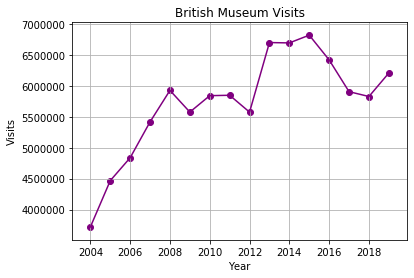

In [24]:
#Ploteamos la visitas Vs años.

numvisits=(bmaño.visits.values)
plt.plot(bmaño.index,numvisits, c='purple')
plt.scatter(bmaño.index,numvisits, c='purple')
plt.ylabel('Visits')
plt.grid()
plt.xlabel('Year')
plt.title('British Museum Visits')

In [25]:
#A partir del british museum dataset que creamos anteriormente, creamos un nuevo dataset donde se discrimine las visitas que
#han tenido por cada mes durante los años en que se recolectaron los datos.

mes=british.groupby(['month','year']).sum()

In [26]:
mes

visits
month year          
1     2005  327033.0
      2006  360700.0
      2007  351099.0
      2008  546448.0
      2009  410035.0
...              ...
12    2015  413442.0
      2016  442708.0
      2017  363281.0
      2018  459485.0
      2019  445302.0

[192 rows x 1 columns]

In [27]:
#Asi discrimino una sola linea del dataset de british museum

british.groupby(['month','year']).get_group((1,2015))

,museum,year,month,visits
321,BRITISH MUSEUM,2015,1,446904.0


In [14]:
#Aca creamos un nuevo dataset llamado jjj el cual discrimina los meses de enero y quita el año 2020 para el british museum.

jjj=british[(british.month==1) & (british.year!=2020)]

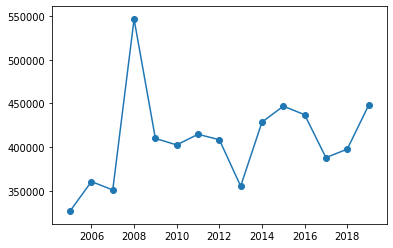

In [15]:
#Se plotea Visitas vs Años

years=jjj.year.values
numbervisits=jjj.visits.values
plt.plot(years,numbervisits)
plt.scatter(years,numbervisits)

In [30]:
# Muestra todos los museos 

data.groupby('museum').sum()


,year,month,visits
museum,,,
(IWM) CHURCHILL WAR ROOMS,386256,1248,6.474053e+06
(IWM) DUXFORD,386256,1248,6.356871e+06
(IWM) HMS BELFAST,386256,1248,4.302644e+06
(IWM) LONDON,386256,1248,1.398644e+07
(IWM) NORTH,386256,1248,4.361722e+06
(NHM) SOUTH KENSINGTON,386256,1248,7.070640e+07
(NHM) TRING,386256,1248,2.095635e+06
(RA) FORT NELSON,380196,1242,1.499318e+06
(RA) LEEDS,380196,1242,3.770425e+06


In [31]:
#si quiero ver todos los museos por un año
dataño=data.loc[data.year==2019]

In [32]:
dataño

,museum,year,month,visits
369,BRITISH MUSEUM,2019,1,447863.0
370,BRITISH MUSEUM,2019,2,470127.0
371,BRITISH MUSEUM,2019,3,494348.0
372,BRITISH MUSEUM,2019,4,487262.0
373,BRITISH MUSEUM,2019,5,546823.0
...,...,...,...,...
11084,MUSEUM IN DOCKLANDS,2019,8,0.0
11085,MUSEUM IN DOCKLANDS,2019,9,0.0
11086,MUSEUM IN DOCKLANDS,2019,10,0.0
11087,MUSEUM IN DOCKLANDS,2019,11,0.0


In [33]:


new=dataño.groupby('museum').sum()
new=new.loc[new.visits>1000000]

In [34]:
new.plot.barh(y='visits')
plt.savefig('grafica.jpg')
plt.close()